#  Determine Miscut of Surface and Align Phi-Axis
*Date of Test Run: 20200910*

**A.** Align $\phi$ axis of the diffractomter with the $c$-axis of the substrate. In doing so, you will be determining the miscut angle of the surface relative to the $c$-planes (basal planes) of the substrate. This should be  between $0^{\circ}$ and $1^{\circ}$. The miscut is the result of how the crystal was cut and polished and usually a specification given by the manufacturer. In some cases, there is an intentional miscut of the surface to enhance epitaxial growth in a process where the nucleation occurs at step edges (a particular orientaion). 
    - Align by adjusting R$_x$ and R$_y$.
**B.** $\phi$ scans as fixed $\omega$, $\chi$

### Follow the steps below to determine the miscut of the substrate:
1. IS = 0.1mm, RS1 = RS2 = 0.2mm for alignment, Soller Slit = $5^{\circ}$.
    - 2$\theta\chi$ scan should be around $10^{6}$ cps (-2 to 2 $^{\circ}$)
    - 2$\theta$ scan, -0.2 to 0.2, flat top looking peak, should be at 0.0018$^{\circ}$
    
    
2. Align the sample (z-scan) (same steps as before) (also involves R$_y$ scan -1 to 1) ($2\theta\omega$ was moved to 1 degree for this part)
3. Now move $2\theta$ to Al$_2$O$_3$ (006) peak ($2\theta  = 41.6666^{\circ}$), do a $\omega$ scan (relative -0.2 to 0.2, 0.001 deg step, 1 deg/min)
    - $2\theta\omega$, -0.1 to 0.1 relative, 0.002 step, 1 deg/min, peak might not be exactly 41.667 (move to that peak), we will keep $2\theta$ equal to this value (~41.6674)
    - Now do $\omega$ scans stepping $45^{\circ}$ in $\phi$ ($\phi = $ 0, 45, 90 135, 180, ..., 360), $\omega$ scans can now be from -0.1 to 0.1 (make a **table** of the $\omega$ peak values at each $\phi$ value). Then fit to the equation below.
    - Rotate to $\phi = \phi_0$
    - Do R$_y$ -0.05 to 0.05 relative, 0.01 step, 0.5 deg/min and R$_x$ -2 to 2, 0.1 step, 8 deg/min

### Calculating Miscut

0. Align in surface normal (you could do this with a laser, but otherwise you use specular reflection from surface to find surface normal, low angle)
1. Determine miscut
1. Go to (006) peak of sapphire
3. $\omega$ vs. $\phi$ plot

# STEP LIST IN-PLANE SCANS (GENERAL)

$$\omega(\phi) = \gamma\sin(\phi-\phi_0)+\omega_0$$

gamma = 0.1393379062177215
phi_0 = -2.3245997325251224
omega_0 = 20.8495
2_theta = 41.699


20.8335

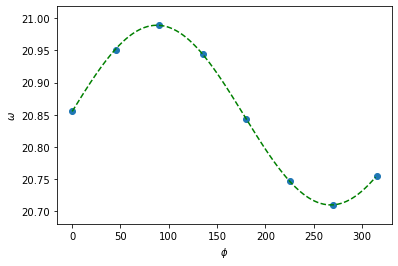

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# For test run of 461 lab 3
# fitting the miscut curve
#phi = [0.,45.,90.,135.,180.,225.,270.,315.]
phi = [0.,45.,90.,135.,180.,225.,270.,315.]
phi2 = [i * math.pi/180 for i in phi]

#measured for Fe2O3 50nm film on 006 sapphire
omega = [20.864,20.856,20.843,20.831, 20.829, 20.836, 20.849, 20.859]
#measured for Pt 18nm film on 006 sapphire
omega2 = [20.856, 20.951, 20.989, 20.944, 20.844, 20.747, 20.710, 20.755]

def fit(x,gamma,phi_0,omega_0):
    return gamma*np.sin(x-phi_0)+omega_0

popt, pcov = curve_fit(fit, phi2, omega2)

x=np.arange(0,315)
x2 =[i * math.pi/180 for i in x]
x3 =[i * 180 / math.pi for i in x2]

plt.scatter(phi,omega2)
plt.plot(x3,fit(x2,*popt),'g--')
plt.xlabel("$\phi$")
plt.ylabel("$\omega$")

print("gamma = " + str(popt[0]))
print("phi_0 = " + str(popt[1]*180/math.pi))
print("omega_0 = " + str(popt[2]))
print("2_theta = "+str(popt[2]*2))
41.667/2

$\phi_0$ is the azimuthal angle at which plane is defined perpendicular to the scattering plane